In [1]:
# manipulating dataframes
import pandas as pd
import numpy as np

# visualizing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('titanic-data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d494a50>,
      dtype=object)

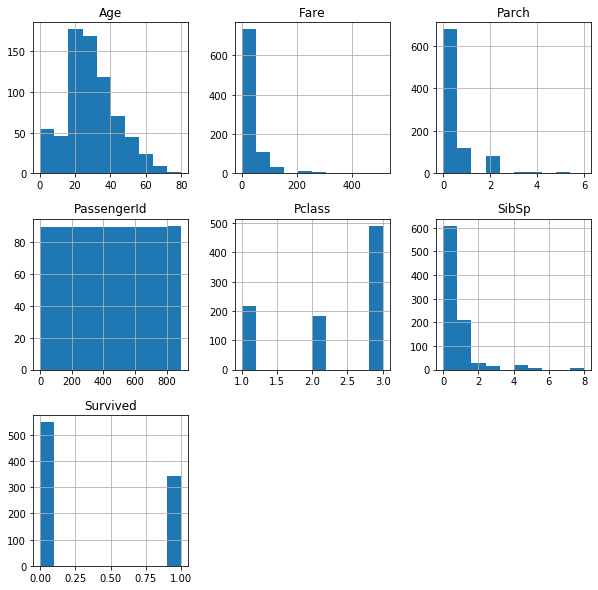

In [5]:
titanic.hist(figsize=(10,10))

### Missing values

In [6]:
titanic.isnull().sum() / len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

 age (about 20% missing)       
 cabin (about 77% missing)                
 embarked (0.2% missing)

### Data imputation for 'age'

Text(0.5, 1.0, 'Distribution of Age (Missing)')

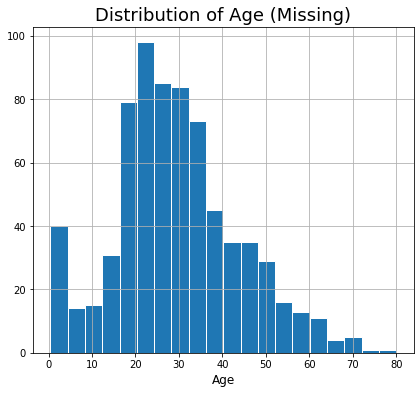

In [7]:
# Plot Distribution of Age (Missing)
plt.subplot(1, 2, 1)
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Missing)', fontsize=18)

After imputation, the age distribution should look similar

In [8]:
def title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'
    else:
        return 'Other'

In [9]:
# feature for the title of each person
titanic['Title'] = titanic['Name'].apply(title)

titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [10]:
titanic.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Other     44.5
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

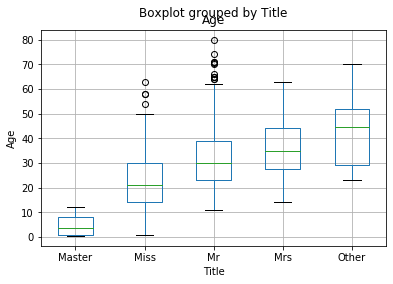

In [11]:
titanic.boxplot(column='Age',by='Title') #Mean Age is different per title
plt.ylabel('Age')

In [12]:
# Fill in the missing age with the median of their Titles
titanic['Age'].fillna(titanic.groupby(["Title"])["Age"].transform(np.median),inplace=True)

Text(0.5, 1.0, 'Distribution of Age (Imputed by Title)')

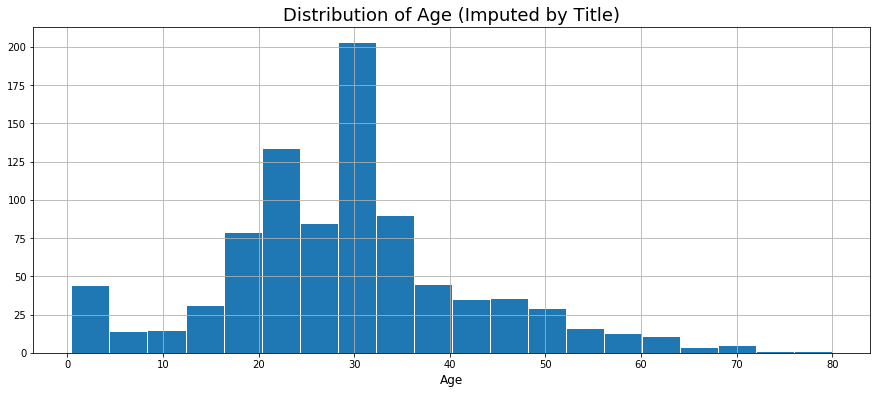

In [13]:
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Imputed by Title)', fontsize=18)

### Imputing for 'embarked'

In [14]:
titanic.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#Impute missing 'Embarked' variable with the most frequent value: (S)**
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])

### Drop 'cabin' as about 80% of the data is missing 

In [16]:
titanic.drop(columns=['Cabin'], inplace=True)

### Interaction features

In [17]:
# Family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

Text(0, 0.5, 'Frequency')

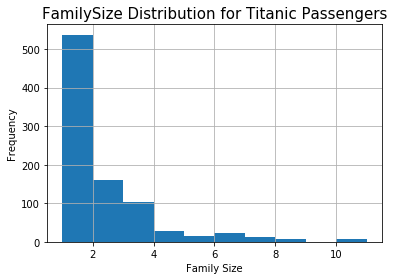

In [18]:
titanic.FamilySize.hist()
plt.title('FamilySize Distribution for Titanic Passengers', size=15)
plt.xlabel("Family Size")
plt.ylabel('Frequency')

In [19]:
# Drop name from the dataset
titanic.drop(columns=['Name'], inplace=True)

In [20]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
bins = [0,12,17,60,150]
labels = ["kid","teen","adult","elderly"]
titanic['AgeGroup'] = pd.cut(titanic.Age,bins=bins,labels=labels)
titanic[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,22.0,adult
1,38.0,adult
2,26.0,adult
3,35.0,adult
4,35.0,adult
5,30.0,adult
6,54.0,adult
7,2.0,kid
8,27.0,adult
9,14.0,teen


In [21]:
titanic_cat = titanic.select_dtypes(include=['object','category'])
titanic_cat.head()

,Sex,Ticket,Embarked,Title,AgeGroup
0,male,A/5 21171,S,Mr,adult
1,female,PC 17599,C,Mrs,adult
2,female,STON/O2. 3101282,S,Miss,adult
3,female,113803,S,Mrs,adult
4,male,373450,S,Mr,adult


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
genre_labels = le.fit_transform(titanic['AgeGroup'])
titanic_cat['AgeGroup_LE'] = genre_labels
titanic_cat[['AgeGroup','AgeGroup_LE']].head(20)

,AgeGroup,AgeGroup_LE
0,adult,0
1,adult,0
2,adult,0
3,adult,0
4,adult,0
5,adult,0
6,adult,0
7,kid,2
8,adult,0
9,teen,3


In [23]:
titanic_cat.head()

,Sex,Ticket,Embarked,Title,AgeGroup,AgeGroup_LE
0,male,A/5 21171,S,Mr,adult,0
1,female,PC 17599,C,Mrs,adult,0
2,female,STON/O2. 3101282,S,Miss,adult,0
3,female,113803,S,Mrs,adult,0
4,male,373450,S,Mr,adult,0


In [24]:
titanic['AgeGroup']= titanic_cat['AgeGroup']
titanic['AgeGroup_LE'] = titanic_cat['AgeGroup_LE']

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,AgeGroup_LE
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,adult,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,adult,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,adult,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2,adult,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1,adult,0


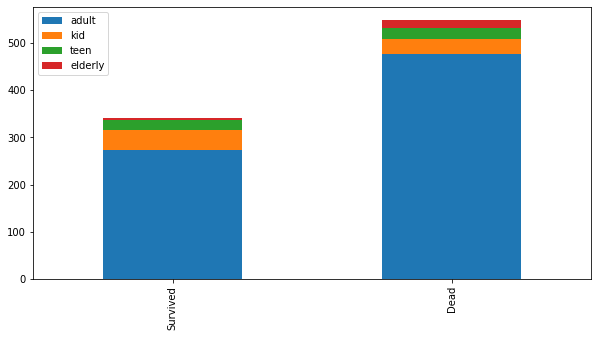

In [26]:
survived = titanic[titanic['Survived']==1]['AgeGroup'].value_counts()
dead = titanic[titanic['Survived']==0]['AgeGroup'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [27]:
#Embarked mapping
genre_labels = le.fit_transform(titanic['Embarked'])
titanic['Embarked_LE'] = genre_labels
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,AgeGroup_LE,Embarked_LE
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,adult,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,adult,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,adult,0,2
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2,adult,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1,adult,0,2
5,6,0,3,male,30.0,0,0,330877,8.4583,Q,Mr,1,adult,0,1
6,7,0,1,male,54.0,0,0,17463,51.8625,S,Mr,1,adult,0,2
7,8,0,3,male,2.0,3,1,349909,21.0750,S,Master,5,kid,2,2
8,9,1,3,female,27.0,0,2,347742,11.1333,S,Mrs,3,adult,0,2
9,10,1,2,female,14.0,1,0,237736,30.0708,C,Mrs,2,teen,3,0


### Create categories for Fare

In [28]:
def fare(x):
    if x <= 17:
        return 0
    elif x <= 30:
        return 1
    elif x <= 100:
        return 2
    else:
        return 3

In [29]:
titanic['fare_gp'] = titanic['Fare'].apply(fare)

titanic['fare_gp'].value_counts()

0    496
2    181
1    161
3     53
Name: fare_gp, dtype: int64

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,AgeGroup_LE,Embarked_LE,fare_gp
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,adult,0,2,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,adult,0,0,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,adult,0,2,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2,adult,0,2,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1,adult,0,2,0


In [31]:
genre_labels = le.fit_transform(titanic['Sex'])
titanic['Sex_LE'] = genre_labels
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,AgeGroup_LE,Embarked_LE,fare_gp,Sex_LE
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,adult,0,2,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,adult,0,0,2,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,adult,0,2,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2,adult,0,2,2,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1,adult,0,2,0,1
5,6,0,3,male,30.0,0,0,330877,8.4583,Q,Mr,1,adult,0,1,0,1
6,7,0,1,male,54.0,0,0,17463,51.8625,S,Mr,1,adult,0,2,2,1
7,8,0,3,male,2.0,3,1,349909,21.0750,S,Master,5,kid,2,2,1,1
8,9,1,3,female,27.0,0,2,347742,11.1333,S,Mrs,3,adult,0,2,0,0
9,10,1,2,female,14.0,1,0,237736,30.0708,C,Mrs,2,teen,3,0,2,0


In [32]:
train = titanic.filter(['FamilySize','AgeGroup_LE','Embarked_LE','fare_gp','Sex_LE','Pclass','Title'],axis=1)

In [33]:
train.head()

,FamilySize,AgeGroup_LE,Embarked_LE,fare_gp,Sex_LE,Pclass,Title
0,2,0,2,0,1,3,Mr
1,2,0,0,2,0,1,Mrs
2,1,0,2,0,0,3,Miss
3,2,0,2,2,0,1,Mrs
4,1,0,2,0,1,3,Mr


In [34]:
titles = pd.DataFrame(['Mr','Mrs','Miss','Master','Other'], columns=['Title'])
title_dummy_features = pd.get_dummies(titles['Title'])
df = pd.concat([titles, title_dummy_features], axis=1)
df.drop(['Title'],axis=1,inplace=True)
df

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame (encoder.fit_transform(train[['Title']]))

train_X_encoded.columns = encoder.get_feature_names(['Title'])

train.drop(['Title'] ,axis=1, inplace=True)

train_X = pd.concat([train, train_X_encoded ], axis=1)

In [36]:
#check for nulls
train_X.isnull().sum()

FamilySize      0
AgeGroup_LE     0
Embarked_LE     0
fare_gp         0
Sex_LE          0
Pclass          0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
dtype: int64

In [37]:
train_X.head()

,FamilySize,AgeGroup_LE,Embarked_LE,fare_gp,Sex_LE,Pclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,2,0,2,0,1,3,0.0,0.0,1.0,0.0,0.0
1,2,0,0,2,0,1,0.0,0.0,0.0,1.0,0.0
2,1,0,2,0,0,3,0.0,1.0,0.0,0.0,0.0
3,2,0,2,2,0,1,0.0,0.0,0.0,1.0,0.0
4,1,0,2,0,1,3,0.0,0.0,1.0,0.0,0.0


In [38]:
#check the data spread
train_X.describe()

,FamilySize,AgeGroup_LE,Embarked_LE,fare_gp,Sex_LE,Pclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.904602,0.336700,1.536476,0.765432,0.647587,2.308642,0.044893,0.204265,0.580247,0.140292,0.030303
std,1.613459,0.827199,0.791503,0.971490,0.477990,0.836071,0.207186,0.403390,0.493796,0.347485,0.171516
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,11.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There is a lot varaince for 'FamilySize'

In [39]:
#Standardization
import sklearn.preprocessing as preproc
df_scale = titanic[['FamilySize']]
df_scale['Family_std'] = preproc.minmax_scale(titanic[['FamilySize']])


In [40]:
df_scale.describe()

,FamilySize,Family_std
count,891.000000,891.000000
mean,1.904602,0.090460
std,1.613459,0.161346
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.100000
max,11.000000,1.000000


In [41]:
train = pd.concat([train_X, df_scale['Family_std']], axis=1)

train.drop(['FamilySize'],axis=1, inplace=True)

In [43]:
train.head()

,AgeGroup_LE,Embarked_LE,fare_gp,Sex_LE,Pclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_std
0,0,2,0,1,3,0.0,0.0,1.0,0.0,0.0,0.1
1,0,0,2,0,1,0.0,0.0,0.0,1.0,0.0,0.1
2,0,2,0,0,3,0.0,1.0,0.0,0.0,0.0,0.0
3,0,2,2,0,1,0.0,0.0,0.0,1.0,0.0,0.1
4,0,2,0,1,3,0.0,0.0,1.0,0.0,0.0,0.0


### Modelling

In [44]:
titanic.Survived.value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [45]:
y = titanic['Survived']

In [46]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.20, random_state=123, stratify=y)

In [56]:
X_train.shape, X_test.shape

((712, 11), (179, 11))

In [57]:
y_train.shape, y_test.shape

((712,), (179,))

In [58]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [60]:
# KNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.81944444 0.83098592 0.87323944 0.81690141 0.84507042
 0.78873239 0.88732394 0.78873239 0.8028169 ]


In [61]:
# kNN Score
round(np.mean(score)*100, 2)


82.87

In [62]:
# DecisionTree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.73611111 0.88888889 0.81690141 0.83098592 0.84507042 0.85915493
 0.77464789 0.87323944 0.76056338 0.83098592]


In [63]:
# DecisionTree Score
round(np.mean(score)*100, 2)


82.17

In [64]:
# RandomForest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73611111 0.86111111 0.81690141 0.90140845 0.84507042 0.87323944
 0.78873239 0.90140845 0.76056338 0.83098592]


In [65]:
round(np.mean(score)*100, 2)

83.16

In [66]:
#NaiveBayes
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)


[0.70833333 0.80555556 0.78873239 0.77464789 0.78873239 0.81690141
 0.8028169  0.81690141 0.76056338 0.77464789]


In [67]:
round(np.mean(score)*100, 2)

78.38

In [68]:
#SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)


[0.81944444 0.86111111 0.8028169  0.8028169  0.83098592 0.83098592
 0.83098592 0.84507042 0.83098592 0.83098592]


In [69]:
round(np.mean(score)*100,2)


82.86

In [75]:
from sklearn.metrics import accuracy_score, classification_report
clf.fit(X_train,y_train)
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(X_test))

array([[97, 13],
       [18, 51]])